# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [2]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.13


In [3]:
# Imports

# Manipulação de dados
import numpy as np
import pandas as pd

# Visualização
import seaborn as sns
import matplotlib.pyplot as plt

# Construção de modelos de árvore de decisão
import sklearn
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

# Avaliação de modelos de árvore de decissão
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# Pré-processamento e separação dos dados
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [4]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -p numpy,pandas,matplotlib,seaborn,sklearn

numpy     : 1.21.5
pandas    : 1.4.4
matplotlib: 3.5.2
seaborn   : 0.11.2
sklearn   : 1.0.2



In [5]:
# Carregando a base de dados
df = pd.read_csv("mod07_demo01_encoded.csv")

In [6]:
# Shape
df.shape

(6770, 30)

In [7]:
# Colunas
df.columns

Index(['Unnamed: 0', 'sexo', 'posse_de_veiculo', 'posse_de_imovel',
       'qtd_filhos', 'idade', 'tempo_emprego', 'possui_celular',
       'possui_fone_comercial', 'possui_fone', 'possui_email',
       'qt_pessoas_residencia', 'mau', 'tipo_renda_Pensioner',
       'tipo_renda_State servant', 'tipo_renda_Student', 'tipo_renda_Working',
       'educacao_Higher education', 'educacao_Incomplete higher',
       'educacao_Lower secondary', 'educacao_Secondary / secondary special',
       'estado_civil_Married', 'estado_civil_Separated',
       'estado_civil_Single / not married', 'estado_civil_Widow',
       'tipo_residencia_House / apartment',
       'tipo_residencia_Municipal apartment',
       'tipo_residencia_Office apartment', 'tipo_residencia_Rented apartment',
       'tipo_residencia_With parents'],
      dtype='object')

In [8]:
# Amostra dos dados
df.head()

,Unnamed: 0,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,0,1,1,0,58.832877,3.106849,1,0,0,...,1,1,0,0,0,1,0,0,0,0
1,1,1,0,1,0,52.356164,8.358904,1,0,1,...,1,0,0,1,0,1,0,0,0,0
2,2,0,1,1,0,46.224658,2.106849,1,1,1,...,0,1,0,0,0,1,0,0,0,0
3,3,1,1,0,0,29.230137,3.021918,1,0,0,...,0,1,0,0,0,1,0,0,0,0
4,4,1,0,1,0,27.482192,4.024658,1,0,1,...,1,1,0,0,0,1,0,0,0,0


In [9]:
#Observando os tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6770 entries, 0 to 6769
Data columns (total 30 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0                              6770 non-null   int64  
 1   sexo                                    6770 non-null   int64  
 2   posse_de_veiculo                        6770 non-null   int64  
 3   posse_de_imovel                         6770 non-null   int64  
 4   qtd_filhos                              6770 non-null   int64  
 5   idade                                   6770 non-null   float64
 6   tempo_emprego                           6770 non-null   float64
 7   possui_celular                          6770 non-null   int64  
 8   possui_fone_comercial                   6770 non-null   int64  
 9   possui_fone                             6770 non-null   int64  
 10  possui_email                            6770 non-null   int6

In [10]:
# Remove a coluna "Unnamed: 0" 
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [11]:
# Separar as variáveis explicativas da target
X = df.drop('mau',axis=1)
y = df.mau

In [12]:
# Separar 70% da base para treinamento e 30% para validação. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [13]:
# 1. Defina um objeto com a função da árvore de decisão
clf = DecisionTreeClassifier(random_state=100)

In [14]:
# 2. Treina o modelo 
clf = clf.fit(X_train,y_train)
clf

DecisionTreeClassifier(random_state=100)

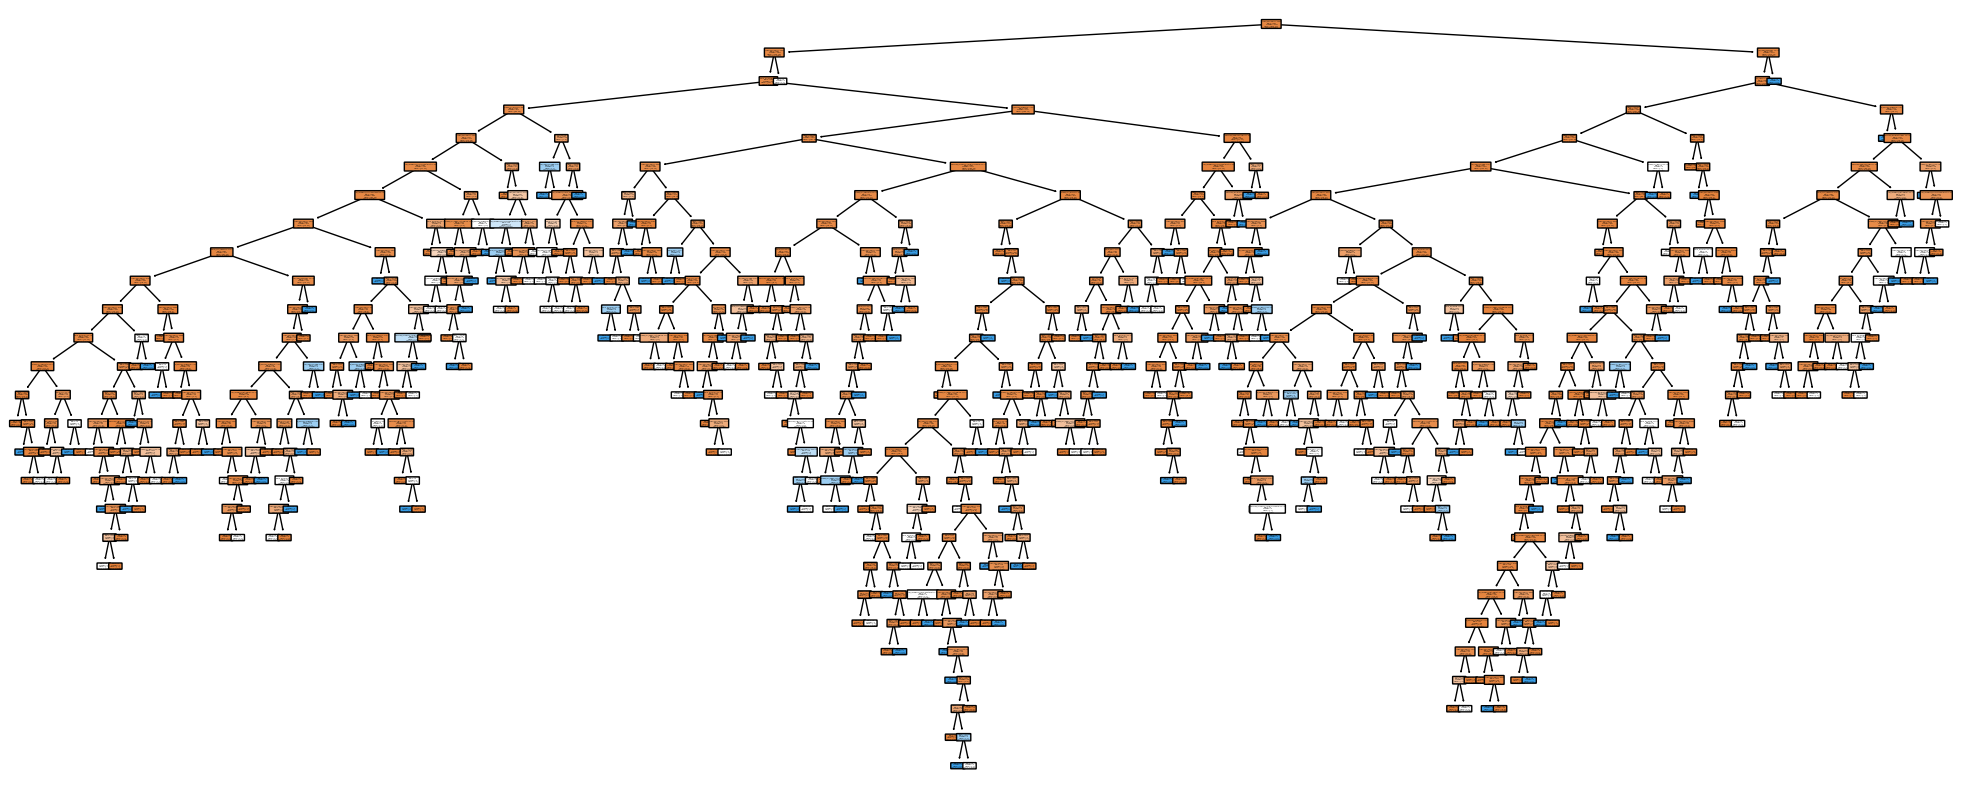

In [15]:
#3. Visualiza a árvore
plt.figure(figsize = [25,10])
plot_tree(clf,
         filled = True,
         rounded = True,
         class_names = ['Aprovado', 'Reprovado'],
         feature_names = X_train.columns);

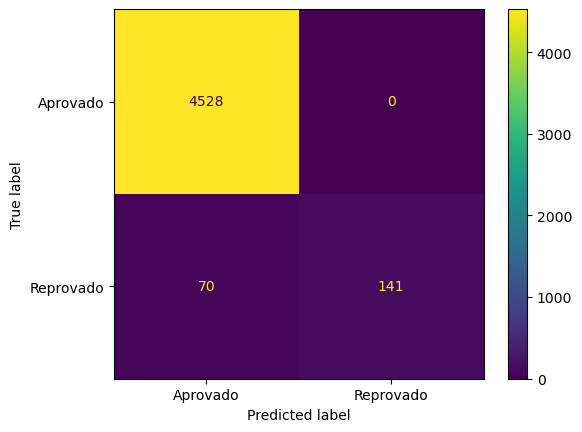

In [16]:
#plot_confusion_matrix(clf, X_train,y_train, display_labels=['Aprovado', 'Reprovado']);

# 4. Produz uma visualização da matriz de classificação (ou matriz de confusão)
# coloque os rótulos como "aprovados" e "reprovados"

from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(clf, X_train,y_train, display_labels=['Aprovado', 'Reprovado']);

In [17]:
# Calcular a acurácia na base de treinamento
predict = clf.predict(X_train)
accuracy_score(y_train, predict)

0.9852289512555391

In [18]:
# Outra possibilidade
clf.score(X_train, y_train)

0.9852289512555391

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [19]:
# 1. Classifica a base de teste
y_teste = clf.predict(X_test)

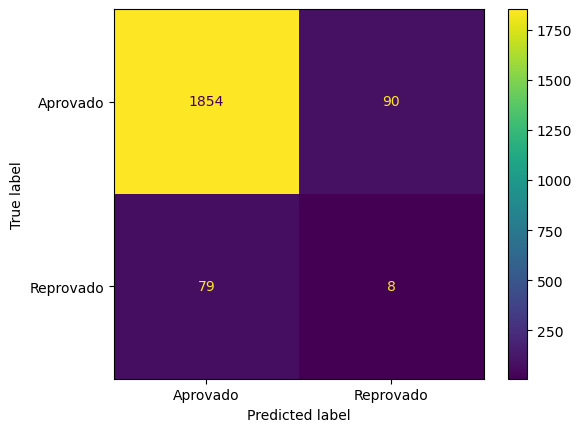

In [20]:
#plot_confusion_matrix(clf, X_test, y_test, display_labels=['aprovado', 'reprovado'])

# 2. Visualização da matriz de confusão
ConfusionMatrixDisplay.from_estimator(clf, X_test,y_test, display_labels=['Aprovado', 'Reprovado']);

In [21]:
# Calcular a acurácia da base de teste
predict = clf.predict(X_test)
accuracy_score(y_test, predict)

0.9167897587395372

- A acurácia de treino teve 99% de acerto e a de teste 92%. 
Com isso podemos observar que a acurácia está muito alta, pode ser uma indicação de overfitting.

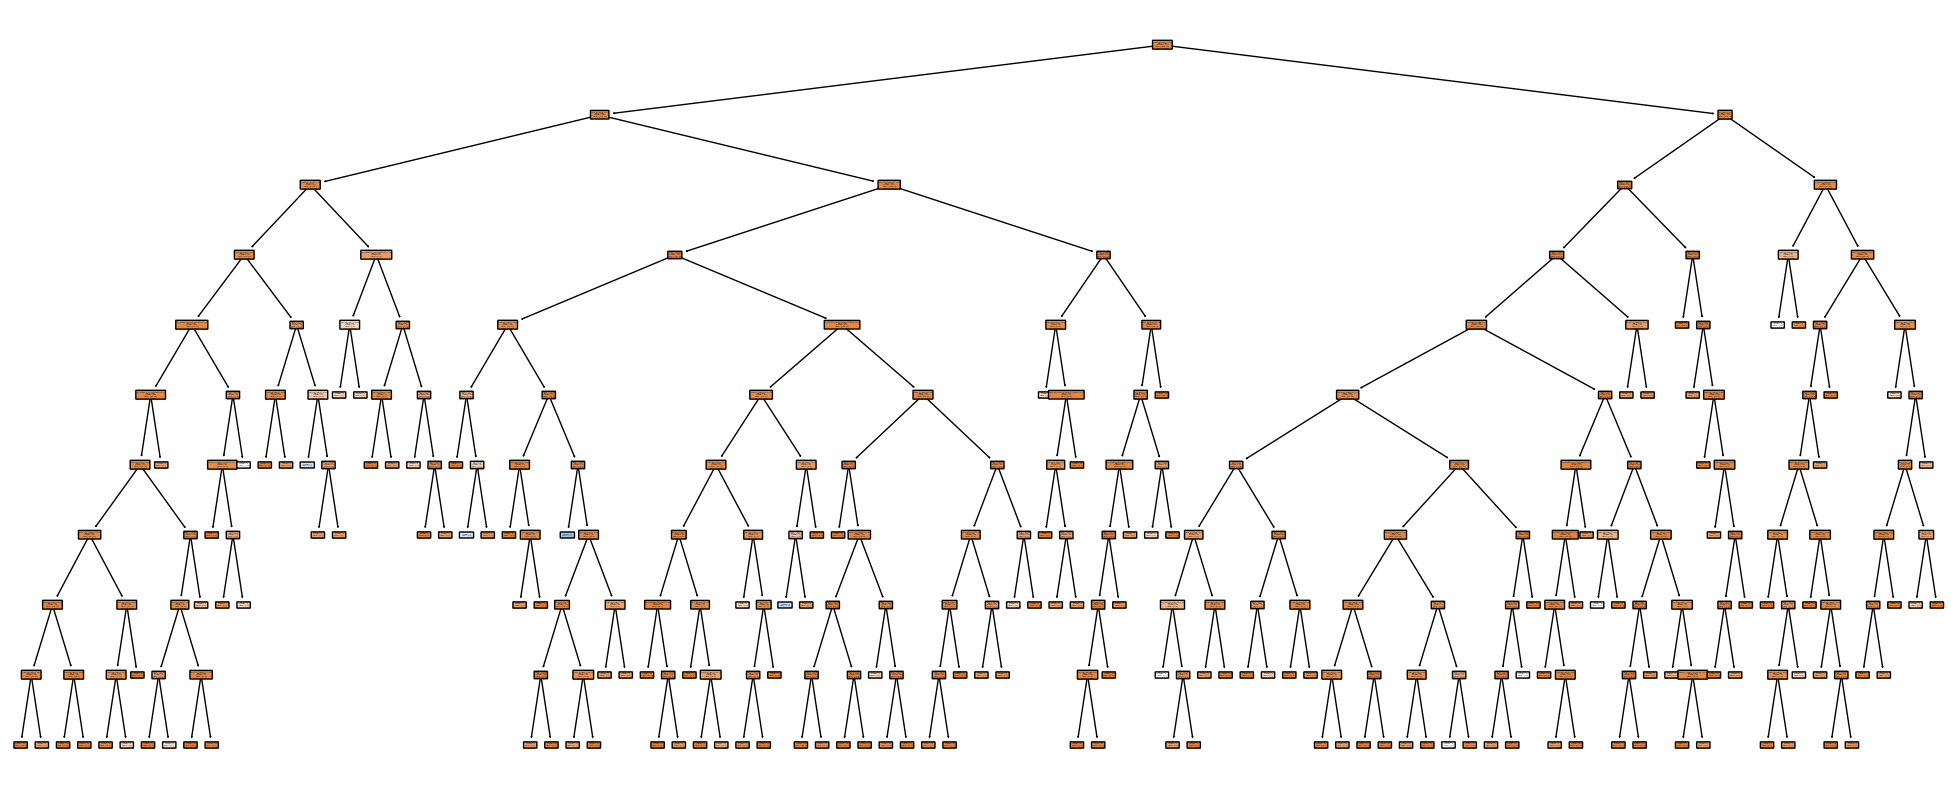

In [22]:
# 4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. 
clf_a = DecisionTreeClassifier(min_samples_leaf = 5,
                                    max_depth = 10,
                                    random_state = 123)

clf_b = clf_a.fit(X_train, y_train)


plt.figure(figsize = [25, 10])

plot_tree(clf_b,
          filled = True,
          rounded = True,
          class_names = ['Aprovado', 'Reprovado'],
          feature_names = X_train.columns);


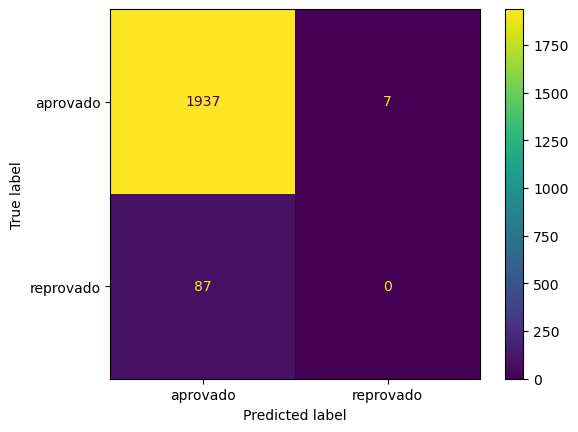

In [23]:
#plot_confusion_matrix(clf_b, X_train, y_train, display_labels = ['Aprovado', 'Reprovado'])

# Avaliar a matriz de classificação.
ConfusionMatrixDisplay.from_estimator(clf_b, X_test, y_test, display_labels=['aprovado', 'reprovado'])

In [24]:
# 5. Calcular a acurácia na base de teste

predict_a = clf_b.predict(X_test)
accuracy_score(y_test, predict_a)

0.9537173806006893

- Em relação a base teste a acuracia aumentou em comparação com o modelo sem poda.
Conseguimos melhorar sua precisão na base de teste e reduzir o overfitting.

In [25]:
# Porcentagem de classificados como 'maus' na primeira arvore
mau_ar_a = 109/(1929 + 109)
mau_ar_a

0.0534838076545633

In [26]:
# Porcentagem de classificados como 'maus' na segunda arvore
mau_ar_b = (46 + 5)/(1939 + 5 + 41 + 46)
mau_ar_b

0.025110782865583457

- A porcentagem da matriz de classificação aumentou de 92% antes da poda para 95% após a poda. Antes da poda 5,35% dos proponentes foram classificados como 'maus', após a poda essa porcentagem caiu para 2,51%.

In [27]:
# Como ficaria a acurácia se você classificasse todos os contratos como 'bons'
acc = 1944/(1944 + 87)
acc

0.9571639586410635